In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [15]:
root_dir = "/mnt/store_dai/datasrc/dchan/gers/change/patches"
fold_nb: int = 0

In [16]:
import sys
sys.path.append("..")

In [17]:
import glob
from pathlib import Path
import csv
from matplotlib import pyplot as plt
import os

import odeon
from odeon.data.data_module import Input
from albumentations.core.transforms_interface import DualTransform

from typing import Optional, Dict

In [18]:
def build_params(stage: str, root_dir: str, fold_nb: int, batch_size: int, num_workers: int, transform: Optional[DualTransform] = None, nb_samples: int = 0, sample_seed = 0) -> Dict:
    fold_dir: str = f'split-{fold_nb}'
    root_fold_dir: str = os.path.join(root_dir, fold_dir)
    dataset: str = os.path.join(root_fold_dir, f'{stage}_split_{fold_nb}.geojson')

    res = {
        'input_fields': {
            "T0": {"name": "T0", "type": "raster", "dtype": "uint8", "band_indices": [1, 2, 3]},
            "T1": {"name": "T1", "type": "raster", "dtype": "uint8", "band_indices": [1, 2, 3]},
            "mask": {"name": "change", "type": "mask", "encoding": "integer"}
        },
        'dataloader_options' : {"batch_size": batch_size, "num_workers": num_workers},
        'input_file': dataset,
        'root_dir': root_dir,
        'nb_samples': nb_samples,
        'sample_seed': sample_seed
    }

    if transform:
        res["transform"] = transform
    return res


In [19]:
nb_samples = 10
batch_size = 10
num_workers = 8
transform = None
seed = 0

fit_params = build_params("train", root_dir, fold_nb, batch_size, num_workers, transform, nb_samples, seed)
val_params = build_params("val", root_dir, fold_nb, batch_size, num_workers, None, nb_samples, seed)
test_params = build_params("test", root_dir, fold_nb, batch_size, num_workers, None, nb_samples, seed)


In [20]:
input = Input(
        fit_params=fit_params,
        validate_params=val_params,
        test_params=test_params
    )

In [21]:
input.prepare_data()
input.setup(stage="fit")

Sampled                                                                               id  \
1694                       473296.0-6289428.800000001-473398.4-6289531.200000001   
3287   453788.80000000005-6316052.800000001-453891.20000000007-6316155.200000001   
1867  449436.80000000005-6290145.6000000015-449539.20000000007-6290248.000000002   
2161             457014.4-6298388.800000001-457116.80000000005-6298491.200000001   
3706           467766.40000000014-6319534.4-467868.80000000016-6319636.800000001   
3050  444316.80000000005-6311393.6000000015-444419.20000000007-6311496.000000002   
1808   443804.80000000016-6290043.200000001-443907.2000000002-6290145.6000000015   
716              458601.6000000001-6279086.4-458704.0000000001-6279188.800000001   
88      499049.6000000001-6260705.6000000015-499152.0000000001-6260808.000000002   
2017            453532.80000000016-6292654.4-453635.2000000002-6292756.800000001   

        id_zone  \
1694   CU_S1_90   
3287  VU_S1_191   
1867   CN_

Sampled                                                                             id  \
127  455836.80000000005-6287841.600000005-455939.20000000007-6287944.000000006   
48                             441398.4-6282312.0-441500.80000000005-6282414.4   
487                    457526.4-6319278.4-457628.80000000005-6319380.800000001   
409                    448771.2000000002-6316872.0-448873.6000000002-6316974.4   
225   456553.6000000002-6287124.800000003-456656.00000000023-6287227.200000003   
339                                      456656.0-6302280.0-456758.4-6302382.4   
239                  503196.80000000005-6287688.0-503299.20000000007-6287790.4   
523                      493776.0-6323732.800000003-493878.4-6323835.200000003   
593                            465718.4-6294600.0-465820.80000000005-6294702.4   
412   448771.2000000002-6317179.200000001-448873.6000000002-6317281.6000000015   

       id_zone  \
127   NU_S1_73   
48    UC_S1_56   
487  VC_S1_208   
409  VC_S1_197   

In [22]:
def image_line(list_images, col_titles):
    # Create a figure to contain the plot.
    figure = plt.figure(figsize=(3 * len(col_titles), 3))
    for i, title in enumerate(col_titles):
        # Start next subplot.
        plt.subplot(1, len(col_titles), i + 1, title=title)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = list_images[i].detach().cpu().permute(1, 2, 0).numpy()
        plt.imshow(img, interpolation='nearest', vmin=0, vmax=255)
        plt.tight_layout()

    return figure


<IPython.core.display.Javascript object>


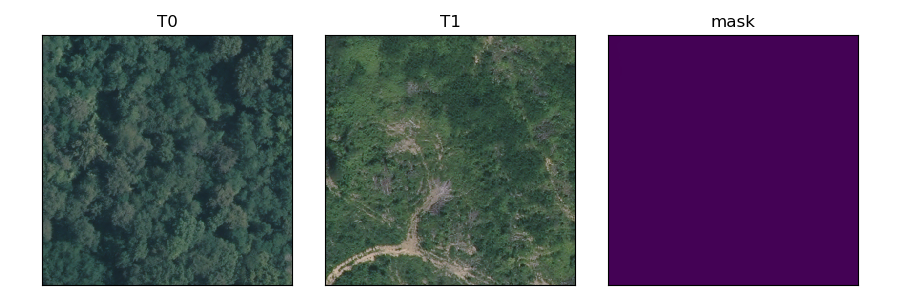

/tmp/ipykernel_61552/534104989.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


In [23]:
v = input.validate.dataset[0]
_ = image_line([v['T0'], v['T1'], v['mask']], ['T0', 'T1', 'mask'])

In [25]:
input.validate.dataset[0]['T0'].shape

torch.Size([3, 512, 512])